In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mental Health in Tech Survey.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [6]:
df.drop('state', axis=1, inplace=True)

In [7]:
df.drop('comments', axis=1, inplace=True)

In [8]:
self_employed_mode = df['self_employed'].mode()[0]
df['self_employed'] = df['self_employed'].fillna(self_employed_mode) 

In [9]:
work_interfere_mode = df['work_interfere'].mode()[0]
df['work_interfere'] = df['work_interfere'].fillna(work_interfere_mode)

In [10]:
df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [11]:
male_list = ['Male', 'male', 'M', 'm', 'Male-ish', 'maile', 'Cis Male', 'Mal', 'Male (CIS)', 'Make']
female_list = ['Female', 'female', 'F', 'f', 'Woman', 'femail', 'Cis Female', 'Femake', 'woman']

def clean_gender(gender_str):
    if gender_str in male_list:
        return 'Male'
    elif gender_str in female_list:
        return 'Female'
    else:
        return 'Other'
df['Gender'] = df['Gender'].apply(clean_gender)

In [12]:
df.drop('Timestamp', axis=1, inplace=True)

In [13]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

In [14]:
from sklearn.preprocessing import LabelEncoder
for column in df.select_dtypes(include=['object']).columns:
    if df[column].nunique() <= 2:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
    else:
        df = pd.get_dummies(df, columns=[column], prefix=column, drop_first=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 90 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             1251 non-null   int64
 1   self_employed                   1251 non-null   int32
 2   family_history                  1251 non-null   int32
 3   treatment                       1251 non-null   int32
 4   remote_work                     1251 non-null   int32
 5   tech_company                    1251 non-null   int32
 6   obs_consequence                 1251 non-null   int32
 7   Gender_Male                     1251 non-null   bool 
 8   Gender_Other                    1251 non-null   bool 
 9   Country_Austria                 1251 non-null   bool 
 10  Country_Belgium                 1251 non-null   bool 
 11  Country_Bosnia and Herzegovina  1251 non-null   bool 
 12  Country_Brazil                  1251 non-null   bool 
 13  Country_

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
X = df.drop('treatment', axis=1)
y = df['treatment']

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)

importances = forest.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

feature_importance_df.head(10)

,feature,importance
2,family_history,0.096272
0,Age,0.090165
64,care_options_Yes,0.043867
53,work_interfere_Often,0.037662
6,Gender_Male,0.028126
55,work_interfere_Sometimes,0.024862
54,work_interfere_Rarely,0.024695
62,benefits_Yes,0.024552
79,coworkers_Some of them,0.023945
3,remote_work,0.022408


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"\nModel training is complete. Predictions have been made on {len(X_test)} samples.")


Model training is complete. Predictions have been made on 251 samples.


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"1. Accuracy: {accuracy:.4f}")
print(f"2. Precision: {precision:.4f}")
print(f"3. Recall: {recall:.4f}")
print(f"4. F1-Score: {f1:.4f}")


1. Accuracy: 0.7530
2. Precision: 0.7559
3. Recall: 0.7559
4. F1-Score: 0.7559


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

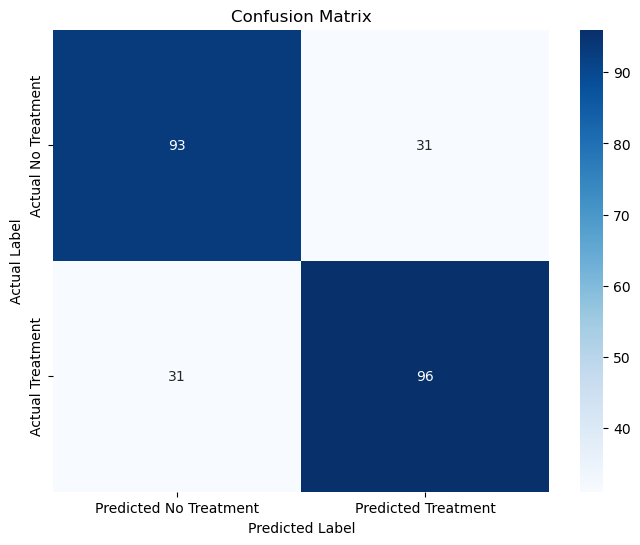

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Treatment', 'Predicted Treatment'], 
            yticklabels=['Actual No Treatment', 'Actual Treatment'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

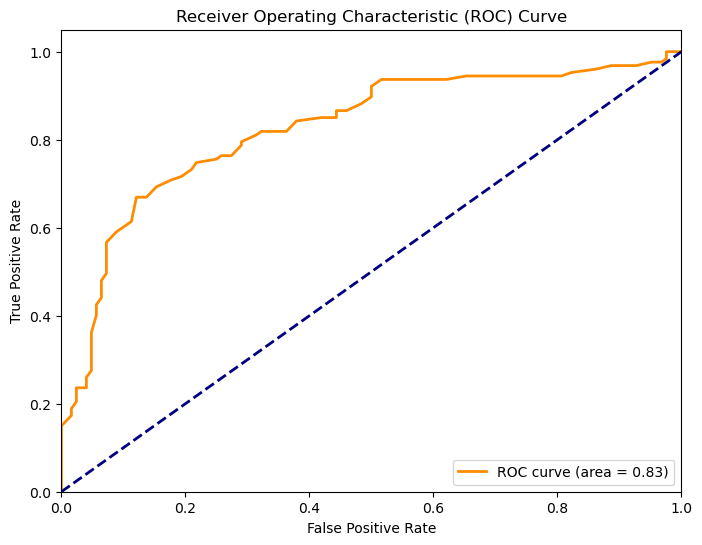

In [21]:
y_pred_proba = model.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

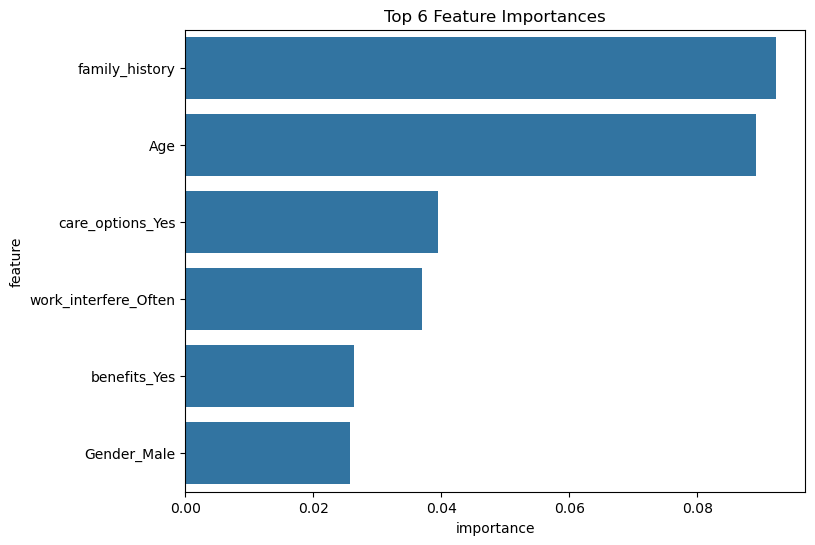

In [22]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(6))
plt.title('Top 6 Feature Importances')
plt.show()